# 01 Random agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [28]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/paulabartabajo/src/online-courses/hands-on-rl/04_lunar_lander/.venv/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Environment 🌎

In [29]:
import gym
env = gym.make('LunarLander-v2')

## Random agent

In [30]:
class RandomAgent:

    def __init__(self, env):
        self.env = env

    def act(self, state) -> int:
        """
        No input arguments to this function.
        The agent does not consider the state of the environment when deciding
        what to do next.
        """
        return self.env.action_space.sample()

agent = RandomAgent(env)

## Evaluate performance of a Random agent ⏱️

In [35]:
from tqdm import tqdm

n_episodes = 100
reward_per_episode = []
success_per_episode = []

for i in tqdm(range(0, n_episodes)):

    state = env.reset()
    total_reward = 0
    done = False
    reward = None
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        state = next_state
        
    reward_per_episode.append(total_reward)
    success_per_episode.append(1 if reward > 0 else 0)

100%|████████████████████████| 100/100 [00:07<00:00, 12.71it/s]


In [34]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

success_rate = np.array(success_per_episode).mean()
print(f'Succes rate = {success_rate:.2%}')

Reward average -198.35, std 103.93
Succes rate = 0.00%


## Reward distribution

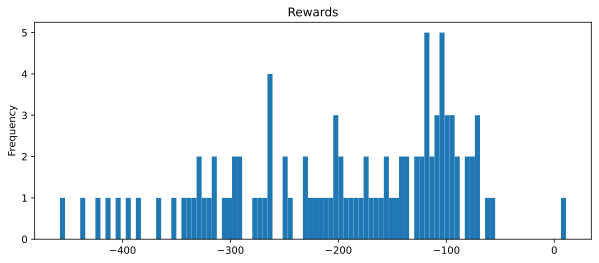

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

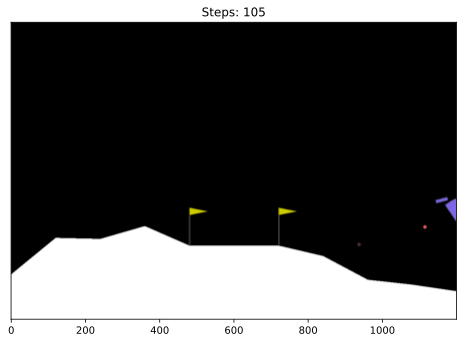

In [27]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)